<p></p>
<p></p>
<h1 style='color:#065164; font-size:45px'><center>EasyMoney Data Analysis</center></h1>
<p></p>
<p></p>

<h1 style='color:#065164; font-size:25px'><center>Data Description</center></h1>

<p>
In this dataset, there are 128258 samples and 47 dimensions, let's take a look to each dimensions:
    <ul>
        <li>id: a unique LC assigned ID for the loan listing.</li>
        <li>loan_amount: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</li>
        <li>funded_amount: The total amount committed to that loan at that point in time.</li>
        <li>funded_amount_investor: The total amount committed by investors for that loan at that point in time.</li>
        <li>term: The number of payments on the loan. Values are in months and can be either 36 or 60.</li>
        <li>interested_rate: Interest Rate on the loan</li>
        <li>installment: The monthly payment owed by the borrower if the loan originates.</li>
        <li>loan_grade: LC(letter of credit) assigned loan grade</li>
        <li>loan_sub_grade: LC assigned loan subgrade</li>
        <li>borrower_job_title: The job title supplied by the Borrower when applying for the loan.*</li>
        <li>borrower_length_experience: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. </li>
        <li>home_ownership: The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</li>
        <li>borrower_annual_income: The self-reported annual income provided by the borrower during registration.</li>
        <li>loan_verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified</li>
        <li>date_loan_funded: The month which the loan was funded</li>
        <li>loan_status: Current status of the loan</li>
        <li>borrower_purpose: A category provided by the borrower for the loan request. </li>
        <li>loan_title: The loan title provided by the borrower</li>
        <li>borrower_zib_code: The first 3 numbers of the zip code provided by the borrower in the loan application.</li>
        <li>address_state: The state provided by the borrower in the loan application</li>
        <li>debt_to_income: Debt-to-Income ratio. A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</li>
        <li>borrower_delinquency_last_2y: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years</li>
        <li>date_credit_line_open: The month the borrower's earliest reported credit line was opened</li>
        <li>fico_rage_low: The lower boundary range the borrower’s FICO at loan origination belongs to.</li>
        <li>fico_range_high: The upper boundary range the borrower’s FICO at loan origination belongs to.</li>
        <li>number_inquiry_last_6mo: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)</li>
        <li>borrower_delinquency_last_6mo: The number of months since the borrower's last delinquency.</li>
        <li>borrower_delinquency_public_record: The number of months since the last public record.</li>
        <li>number_credit_line: The number of open credit lines in the borrower's credit file.</li>
        <li>number_deliquency_public_record: Number of derogatory public records</li>
        <li>credit_revolve_balance: Total credit revolving balance</li>
        <li>credit_revolve_utilization: </li>
        <li>total_credit_line: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</li>
        <li>initial_list_status: The initial listing status of the loan. Possible values are – W (Whole), F (Fraction)</li>
        <li>outstanding_principal: Remaining outstanding principal for total amount funded</li>
        <li>outstanding_pricipal_investor: Remaining outstanding principal for portion of total amount funded by investors</li>
        <li>total_payment: Payments received to date for total amount funded</li>
        <li>total_payment_investor: Payments received to date for portion of total amount funded by investors</li>
        <li>total_receive_principal: Principal received to date</li>
        <li>total_receive_investor: Interest received to date</li>
        <li>toal_receive_late_fee: Late fees received to date</li>
        <li>recoveries: post charge off gross recovery</li>
        <li>collection_recovery_fee: post charge off collection fee</li>
        <li>last_payment_date: Last month payment was received</li>
        <li>last_payment_amount: Last total payment amount received</li>
        <li>next_payment_date: Next scheduled payment date</li>
        <li>last_credit_pull_date: The most recent month LC pulled credit for this loan</li>
    </ul>
</p>

<h1 style='color:#065164; font-size:25px'><center>How does it work/step?</center></h1>

<p>
To work ft loan price and status prediction, we all need to follow these steps to build ML model:
    <ol>
        <li>Import Dependencies</li>
        <li>Data Analysis
            <ul>
                <li>Exploratory Data Analysis</li>
                <li>Data Wrangling</li>
                <li>Data Visualization And Analysis</li>
            </ul>
        </li>

<h1 style='color:#065164'>1. Import Dependencies</h1>

In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#set bc seaborn as the defualt
sns.set_theme()


import warnings
warnings.filterwarnings("ignore")
import sklearn
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#Random Forest
from sklearn.ensemble import RandomForestClassifier
#Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#Evaluation
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

In [2]:
#set full display all features
pd.set_option('display.max_columns', None)
data = pd.read_csv('Dataset/loan_status_prediction_dataset.csv')
data.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,163477201,5000,5000,5000,36 months,17.74%,180.12,C,C5,Lead Mtc Tech,2 years,RENT,50000.0,Source Verified,Dec-19,Current,debt_consolidation,Debt consolidation,128xx,NY,15.17,0,May-08,685,689,1,NaN,NaN,4,0,2453,81.80%,6,f,4619.31,4619.31,713.09,713.09,380.69,332.40,0.0,0.0,0.0,May-20,180.12,Jun-20,May-20
1,164027473,20000,20000,20000,36 months,12.40%,668.12,B,B4,NaN,< 1 year,RENT,13000.0,Verified,Dec-19,Current,small_business,Business,986xx,WA,79.59,0,Dec-10,665,669,2,NaN,94.0,6,1,12325,59.30%,9,f,19058.87,19058.87,1315.57,1315.57,941.13,374.44,0.0,0.0,0.0,May-20,0.00,Jun-20,May-20
2,164137439,33000,33000,33000,60 months,15.24%,789.24,C,C2,Financial Analyst,10+ years,MORTGAGE,84000.0,Source Verified,Dec-19,Current,credit_card,Credit card refinancing,480xx,MI,35.07,0,Dec-88,695,699,0,NaN,NaN,26,0,79282,46.40%,50,w,31476.80,31476.80,3115.05,3115.05,1523.20,1591.85,0.0,0.0,0.0,May-20,0.00,Jun-20,May-20


<h1 style='color:#065164'>2. Data Analysis
</h1>

<h3 style='color:#065164'>2.1 Exploratory Data Analysis</h3>

In [3]:
data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d'],
      dtype='object')

In [4]:
print("Number Of Dimension:", data.shape[1])
print("*" * 50)
print("Number Of Samples:", data.shape[0])

Number Of Dimension: 47
**************************************************
Number Of Samples: 128258


In [5]:
# display basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128258 entries, 0 to 128257
Data columns (total 47 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       128258 non-null  int64  
 1   loan_amnt                128258 non-null  int64  
 2   funded_amnt              128258 non-null  int64  
 3   funded_amnt_inv          128258 non-null  int64  
 4   term                     128258 non-null  object 
 5   int_rate                 128258 non-null  object 
 6   installment              128258 non-null  float64
 7   grade                    128258 non-null  object 
 8   sub_grade                128258 non-null  object 
 9   emp_title                109087 non-null  object 
 10  emp_length               117027 non-null  object 
 11  home_ownership           128258 non-null  object 
 12  annual_inc               128258 non-null  float64
 13  verification_status      128258 non-null  object 
 14  issu

In [6]:
#check missing value if there are any missing data.
missing_value = data.isnull().sum()
percent_missing_value = missing_value / len(data)
print("*" * 50)
print("Missing value:", missing_value)
print("*" * 50)
print("Pecent of Missing value:", percent_missing_value)

**************************************************
Missing value: id                              0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                   19171
emp_length                  11231
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
purpose                         0
title                           0
zip_code                        0
addr_state                      0
dti                           231
delinq_2yrs                     0
earliest_cr_line                0
fico_range_low                  0
fico_range_high                 0
inq_last_6mths                  0
mths_since_last_delinq      72115
mths_since_last_

In [7]:
#Descriptive Statistic
data.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,1.282580e+05,128258.000000,128258.000000,128258.000000,128258.000000,1.282580e+05,128027.000000,128258.000000,128258.000000,128258.000000,128258.000000,56143.000000,12944.000000,128258.000000,128258.000000,1.282580e+05,128258.000000,128258.000000,128258.000000,128258.000000,128258.000000,128258.000000,128258.000000,128258.00000,128258.000000,128258.000000,128258.000000
mean,1.616446e+08,16276.080634,16276.080634,16273.393083,470.932802,8.579460e+04,21.066422,0.236710,704.961562,708.961780,0.528918,36.310635,86.693989,11.802094,0.102356,1.786384e+04,23.336416,13574.234968,13572.065368,3527.923225,3527.313842,2613.861391,912.093107,0.18927,1.779427,0.062696,1141.535812
std,1.350068e+06,10281.910603,10281.910603,10281.072014,289.988822,1.031360e+05,19.717719,0.757576,34.976477,34.977355,0.790365,21.772777,23.057294,6.028849,0.308649,2.336172e+04,12.428671,9781.778293,9781.009799,4387.187445,4386.798458,4249.054535,725.410296,2.77064,146.306181,8.518903,3862.617777
min,1.571072e+08,1000.000000,1000.000000,975.000000,30.640000,0.000000e+00,0.000000,0.000000,660.000000,664.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-9304.140000
25%,1.605352e+08,8400.000000,8400.000000,8400.000000,254.797500,5.000000e+04,12.950000,0.000000,680.000000,684.000000,0.000000,19.000000,71.000000,8.000000,0.000000,6.124000e+03,14.000000,5944.320000,5941.917500,1473.940000,1473.730000,890.777500,370.862500,0.00000,0.000000,0.000000,143.222500
50%,1.616534e+08,14000.000000,14000.000000,14000.000000,396.920000,7.000000e+04,19.270000,0.000000,700.000000,704.000000,0.000000,33.000000,91.000000,11.000000,0.000000,1.203200e+04,21.000000,11383.610000,11380.995000,2396.950000,2396.190000,1497.555000,720.260000,0.00000,0.000000,0.000000,343.240000
75%,1.627605e+08,22525.000000,22525.000000,22525.000000,634.230000,1.000000e+05,26.530000,0.000000,725.000000,729.000000,1.000000,52.000000,106.000000,15.000000,0.000000,2.180700e+04,30.000000,19627.445000,19623.107500,3971.155000,3970.850000,2552.447500,1257.157500,0.00000,0.000000,0.000000,628.490000
max,1.641932e+08,40000.000000,40000.000000,40000.000000,1671.880000,9.682505e+06,999.000000,23.000000,845.000000,850.000000,5.000000,161.000000,119.000000,104.000000,5.000000,1.678904e+06,145.000000,39581.240000,39581.240000,45537.600000,45537.600000,40000.000000,7011.280000,142.29000,23040.000000,1557.468000,41557.180000


<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Correlation Matrix</center></h3>
<p></p>
<p></p>
<p></p>

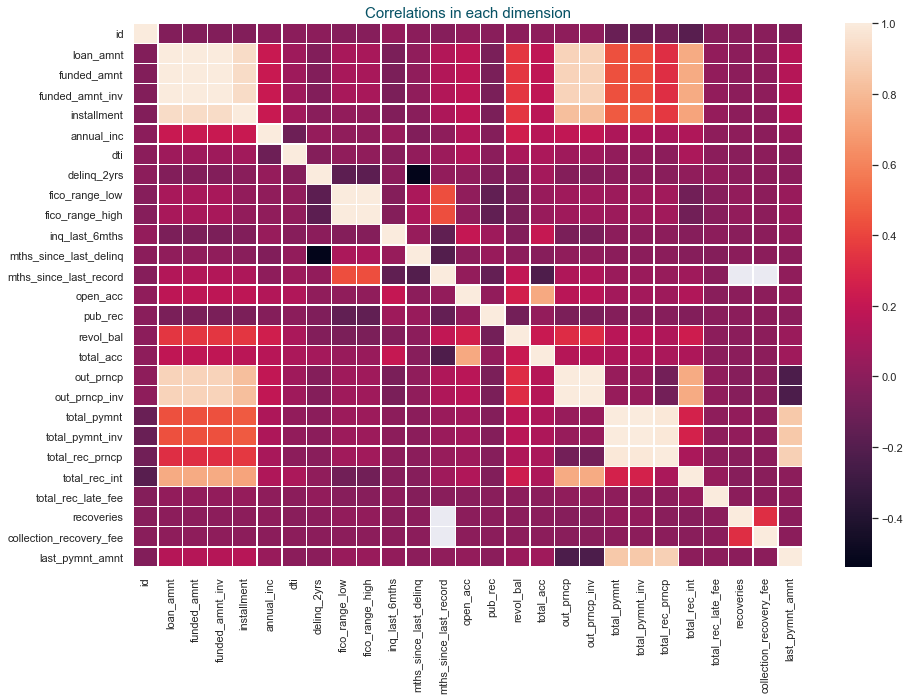

In [8]:
correlations = data.corr(method='pearson')
#we wanna show u via heatmap
#we use seaborn library to visualize (heatmap)
plt.subplots(figsize=(15,10))
sns.heatmap(correlations, 
           xticklabels=correlations.columns.values,
           yticklabels=correlations.columns.values,linewidths=.5)
           #, height=5, aspect=11/4)
plt.title('Correlations in each dimension', fontsize='15', color='#065164')
plt.show()

In [9]:
#overview correlation between features
data.corr().style.background_gradient(cmap='BuGn')

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
id,1.000000,-0.030087,-0.030087,-0.030153,-0.031816,0.000889,-0.002091,0.003137,-0.018906,-0.018908,0.030390,-0.002475,-0.018179,0.016201,-0.008855,0.004191,0.013667,0.012092,0.012036,-0.119381,-0.119414,-0.090994,-0.186344,-0.024614,-0.012747,-0.004975,-0.031486
loan_amnt,-0.030087,1.000000,1.000000,0.999988,0.936398,0.222528,0.066148,-0.029299,0.100314,0.100314,-0.052837,0.016360,0.137627,0.180232,-0.062312,0.354693,0.185220,0.903527,0.903511,0.439052,0.439058,0.326160,0.744220,0.023518,0.002750,0.007842,0.148422
funded_amnt,-0.030087,1.000000,1.000000,0.999988,0.936398,0.222528,0.066148,-0.029299,0.100314,0.100314,-0.052837,0.016360,0.137627,0.180232,-0.062312,0.354693,0.185220,0.903527,0.903511,0.439052,0.439058,0.326160,0.744220,0.023518,0.002750,0.007842,0.148422
funded_amnt_inv,-0.030153,0.999988,0.999988,1.000000,0.936333,0.222490,0.066181,-0.029260,0.100174,0.100174,-0.052785,0.016328,0.137611,0.180211,-0.062302,0.354680,0.185200,0.903526,0.903530,0.439046,0.439064,0.326131,0.744352,0.023531,0.002753,0.007845,0.148430
installment,-0.031816,0.936398,0.936398,0.936333,1.000000,0.220757,0.074587,-0.006085,0.025230,0.025230,-0.037816,-0.008288,0.118270,0.176935,-0.057056,0.351712,0.169109,0.821721,0.821656,0.465779,0.465763,0.358247,0.717676,0.033665,0.003726,0.007068,0.157213
annual_inc,0.000889,0.222528,0.222528,0.222490,0.220757,1.000000,-0.107995,0.035634,0.015075,0.015075,0.041353,-0.038911,0.013034,0.137899,-0.025429,0.253563,0.157890,0.189805,0.189771,0.116259,0.116242,0.098061,0.126954,0.011987,0.008604,0.001538,0.047018
dti,-0.002091,0.066148,0.066148,0.066181,0.074587,-0.107995,1.000000,-0.024196,0.019106,0.019103,-0.010818,0.022811,0.059549,0.132720,-0.003678,0.104491,0.113953,0.069812,0.069838,0.020055,0.020078,0.002028,0.110579,-0.002990,-0.006261,0.002310,-0.001698
delinq_2yrs,0.003137,-0.029299,-0.029299,-0.029260,-0.006085,0.035634,-0.024196,1.000000,-0.167668,-0.167665,-0.000872,-0.539619,0.025436,0.019287,-0.045667,-0.031519,0.091320,-0.027128,-0.027090,-0.004147,-0.004136,-0.006859,0.015357,0.021181,-0.001702,-0.002203,-0.003913
fico_range_low,-0.018906,0.100314,0.100314,0.100174,0.025230,0.015075,0.019106,-0.167668,1.000000,1.000000,-0.026296,0.111131,0.431738,0.015447,-0.153688,-0.054792,0.048264,0.070180,0.070067,0.060357,0.060273,0.077206,-0.091547,-0.010694,0.021749,0.004253,0.046163
fico_range_high,-0.018908,0.100314,0.100314,0.100174,0.025230,0.015075,0.019103,-0.167665,1.000000,1.000000,-0.026298,0.111131,0.431738,0.015446,-0.153687,-0.054792,0.048262,0.070179,0.070066,0.060356,0.060272,0.077204,-0.091545,-0.010694,0.021756,0.004253,0.046162


In [10]:
#rename features
data.rename(columns={
    'id':'id',
    'loan_amnt' : 'loan_amount',  
    'funded_amnt':'funded_amount',
    'funded_amnt_inv':'funded_amount_investor',
    'term':'term',
    'int_rate': 'interested_rate',
    'installment':'installment',
    'grade':'loan_grade',
    'sub_grade':'loan_sub_grade',
    'emp_title':'borrower_job_title',
    'emp_length':'borrower_length_expereince',
    'home_ownership':'home_ownership',
    'annual_inc':'borrower_annual_income',
    'verification_status':'loan_verification_status',
    'issue_d':'date_loan_funded',
    'loan_status':'loan_status',
    'purpose':'borrower_purpose',
    'title':'loan_title',
    'zip_code':'borrower_zip_code',
    'addr_state':'address_state',
    'dti':'debt_to_income',
    'delinq_2yrs':'borrower_delinquency_last_2y',
    'earliest_cr_line':'date_credit_line_open',
    'fico_range_low':'fico_rage_low',
    'fico_range_high':'fico_range_high',
    'inq_last_6mths':'number_inquiry_last_6mo',  
    'mths_since_last_delinq':'borrower_delinquency_last_6mo',
    'mths_since_last_record':'borrower_delinquency_public_record',  
    'open_acc':'number_credit_line',
    'pub_rec':'number_deliquency_public_record',
    'revol_bal':'credit_revolve_balance', 
    'revol_util':'credit_revolve_utilization',   
    'total_acc':'total_credit_line',  
    'initial_list_status':'initial_list_status',  
    'out_prncp':'outstanding_principal', 
    'out_prncp_inv':'outstanding_pricipal_investor', 
    'total_pymnt':'total_payment',
    'total_pymnt_inv':'total_payment_investor',
    'total_rec_prncp':'total_receive_principal',
    'total_rec_int':'total_receive_investor',
    'total_rec_late_fee':'toal_receive_late_fee',
    'recoveries':'recoveries',
    'collection_recovery_fee':'collection_recovery_fee',
    'last_pymnt_d':'last_payment_date', 
    'last_pymnt_amnt':'last_payment_amount',
    'next_pymnt_d':'next_payment_date',
    'last_credit_pull_d':'last_credit_pull_date'                    
}, inplace=True)
data.head(3)

,id,loan_amount,funded_amount,funded_amount_investor,term,interested_rate,installment,loan_grade,loan_sub_grade,borrower_job_title,borrower_length_expereince,home_ownership,borrower_annual_income,loan_verification_status,date_loan_funded,loan_status,borrower_purpose,loan_title,borrower_zip_code,address_state,debt_to_income,borrower_delinquency_last_2y,date_credit_line_open,fico_rage_low,fico_range_high,number_inquiry_last_6mo,borrower_delinquency_last_6mo,borrower_delinquency_public_record,number_credit_line,number_deliquency_public_record,credit_revolve_balance,credit_revolve_utilization,total_credit_line,initial_list_status,outstanding_principal,outstanding_pricipal_investor,total_payment,total_payment_investor,total_receive_principal,total_receive_investor,toal_receive_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date
0,163477201,5000,5000,5000,36 months,17.74%,180.12,C,C5,Lead Mtc Tech,2 years,RENT,50000.0,Source Verified,Dec-19,Current,debt_consolidation,Debt consolidation,128xx,NY,15.17,0,May-08,685,689,1,NaN,NaN,4,0,2453,81.80%,6,f,4619.31,4619.31,713.09,713.09,380.69,332.40,0.0,0.0,0.0,May-20,180.12,Jun-20,May-20
1,164027473,20000,20000,20000,36 months,12.40%,668.12,B,B4,NaN,< 1 year,RENT,13000.0,Verified,Dec-19,Current,small_business,Business,986xx,WA,79.59,0,Dec-10,665,669,2,NaN,94.0,6,1,12325,59.30%,9,f,19058.87,19058.87,1315.57,1315.57,941.13,374.44,0.0,0.0,0.0,May-20,0.00,Jun-20,May-20
2,164137439,33000,33000,33000,60 months,15.24%,789.24,C,C2,Financial Analyst,10+ years,MORTGAGE,84000.0,Source Verified,Dec-19,Current,credit_card,Credit card refinancing,480xx,MI,35.07,0,Dec-88,695,699,0,NaN,NaN,26,0,79282,46.40%,50,w,31476.80,31476.80,3115.05,3115.05,1523.20,1591.85,0.0,0.0,0.0,May-20,0.00,Jun-20,May-20


<h3 style='color:#065164'>2.2 Data Wrangling || Cleaning</h3>

In [11]:
#Change datatype some dimensions
#we need to convert some dimension to string type before using str.replace() function
data.interested_rate = data.interested_rate.astype(str)
data['interested_rate'] = data['interested_rate'].str.replace('%','').astype(float)
data.term = data.term.astype(str)
data['term'] = data['term'].str.replace('months','').astype(int)
data.credit_revolve_utilization = data.credit_revolve_utilization.astype(str)
data['credit_revolve_utilization'] = data['credit_revolve_utilization'].str.replace('%','').astype(float)

In [12]:
#borrower_length_expereince, borrower_zip_code
data.borrower_length_expereince = data.borrower_length_expereince.astype(str)

data['borrower_length_expereince'] = data['borrower_length_expereince'].str.replace('year','')
data['borrower_length_expereince'] = data['borrower_length_expereince'].str.replace('<','')
data['borrower_length_expereince'] = data['borrower_length_expereince'].str.replace('+','')
data['borrower_length_expereince'] = data['borrower_length_expereince'].str.replace('s','')
data['borrower_length_expereince'] = data['borrower_length_expereince'].str.replace('nan','0')

In [13]:
data["borrower_delinquency_last_6mo"] = data["borrower_delinquency_last_6mo"].fillna(0)
data["borrower_delinquency_public_record"] = data["borrower_delinquency_public_record"].fillna(0)
data["credit_revolve_utilization"] = data["credit_revolve_utilization"].fillna(0)
data["borrower_length_expereince"] = data["borrower_length_expereince"].fillna(0)
data["borrower_job_title"] = data["borrower_job_title"].fillna(0)

In [14]:
data.borrower_zip_code = data.borrower_zip_code.astype(str)
data['borrower_zip_code'] = data['borrower_zip_code'].str.replace('xx','')

In [15]:
total_sample = data.shape[0]
duplicate_sample = data.duplicated(subset=['id', 'loan_amount','borrower_job_title'], keep='first')
count_duplicate_sample = duplicate_sample.value_counts()

count_duplicate_sample
#False, it means dataset has no duplicate value

False    128258
dtype: int64

In [16]:
data.head(3)

,id,loan_amount,funded_amount,funded_amount_investor,term,interested_rate,installment,loan_grade,loan_sub_grade,borrower_job_title,borrower_length_expereince,home_ownership,borrower_annual_income,loan_verification_status,date_loan_funded,loan_status,borrower_purpose,loan_title,borrower_zip_code,address_state,debt_to_income,borrower_delinquency_last_2y,date_credit_line_open,fico_rage_low,fico_range_high,number_inquiry_last_6mo,borrower_delinquency_last_6mo,borrower_delinquency_public_record,number_credit_line,number_deliquency_public_record,credit_revolve_balance,credit_revolve_utilization,total_credit_line,initial_list_status,outstanding_principal,outstanding_pricipal_investor,total_payment,total_payment_investor,total_receive_principal,total_receive_investor,toal_receive_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date
0,163477201,5000,5000,5000,36,17.74,180.12,C,C5,Lead Mtc Tech,2,RENT,50000.0,Source Verified,Dec-19,Current,debt_consolidation,Debt consolidation,128,NY,15.17,0,May-08,685,689,1,0.0,0.0,4,0,2453,81.8,6,f,4619.31,4619.31,713.09,713.09,380.69,332.40,0.0,0.0,0.0,May-20,180.12,Jun-20,May-20
1,164027473,20000,20000,20000,36,12.40,668.12,B,B4,0,1,RENT,13000.0,Verified,Dec-19,Current,small_business,Business,986,WA,79.59,0,Dec-10,665,669,2,0.0,94.0,6,1,12325,59.3,9,f,19058.87,19058.87,1315.57,1315.57,941.13,374.44,0.0,0.0,0.0,May-20,0.00,Jun-20,May-20
2,164137439,33000,33000,33000,60,15.24,789.24,C,C2,Financial Analyst,10,MORTGAGE,84000.0,Source Verified,Dec-19,Current,credit_card,Credit card refinancing,480,MI,35.07,0,Dec-88,695,699,0,0.0,0.0,26,0,79282,46.4,50,w,31476.80,31476.80,3115.05,3115.05,1523.20,1591.85,0.0,0.0,0.0,May-20,0.00,Jun-20,May-20


<h3 style='color:#065164'>2.3 Data Visualization && Analysis</h3>

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Loan Gradec By Loan Funded</center></h3>
<p></p>
<p></p>
<p></p>

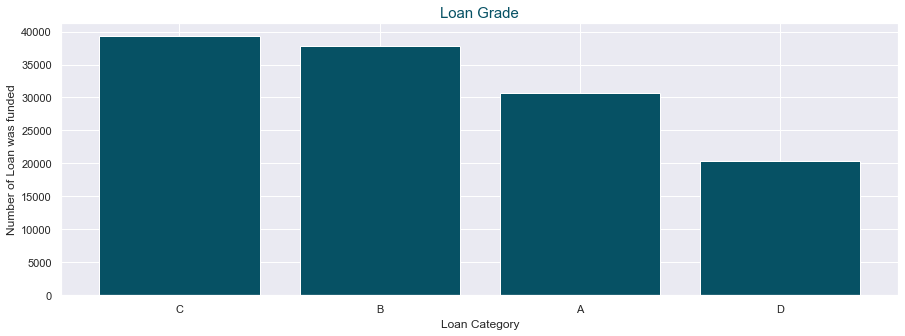

In [17]:
#count loan grade
loan_grade = data['loan_grade'].value_counts()
plt.figure(figsize=(15,5))
plt.bar(data['loan_grade'].unique(), loan_grade,color='#065164')
plt.title('Loan Grade', fontsize='15', color='#065164')
plt.xlabel('Loan Category')
plt.ylabel('Number of Loan was funded')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Loan Grade By Term</center></h3>
<p></p>
<p></p>
<p></p>

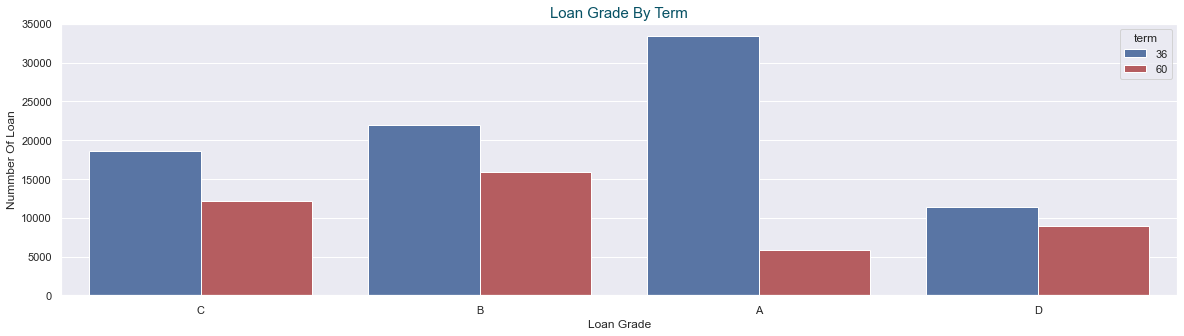

In [18]:
#Loan grade by term
plt.figure(figsize=(20,5))
sns.countplot(x='loan_grade', hue='term', palette=['b','r'], data=data)
plt.title('Loan Grade By Term', fontsize='15', color='#065164')
plt.xlabel("Loan Grade")
plt.ylabel('Nummber Of Loan')
plt.xticks(rotation='0')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Loan Sub Grade By Loan Funded</center></h3>
<p></p>
<p></p>
<p></p>

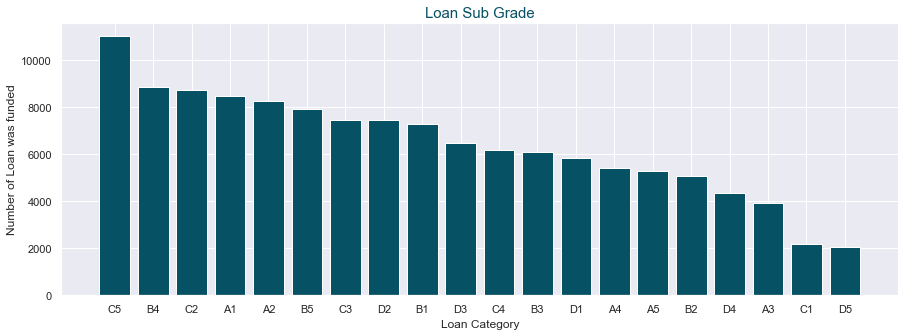

In [19]:
#count loan grade average
loan_sub_grade = data['loan_sub_grade'].value_counts()
plt.figure(figsize=(15,5))
plt.bar(data['loan_sub_grade'].unique(), loan_sub_grade,color='#065164')
plt.title('Loan Sub Grade', fontsize='15', color='#065164')
plt.xlabel('Loan Category')
plt.ylabel('Number of Loan was funded')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Loan Sub Grade By Term</center></h3>
<p></p>
<p></p>
<p></p>

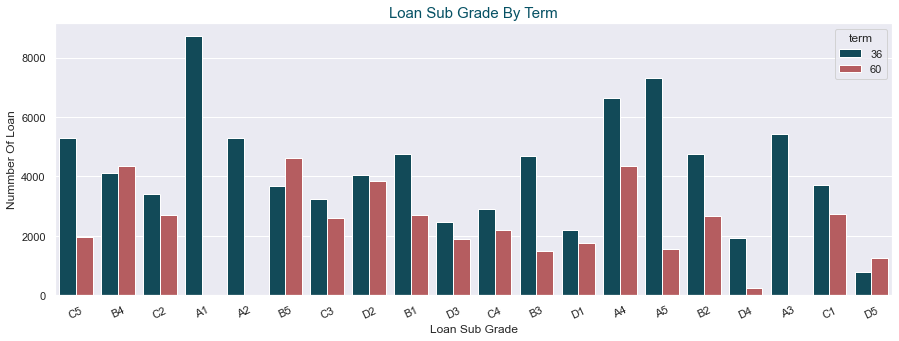

In [20]:
#Loan sub grade by term
fig = plt.figure(figsize = (15,5))
sns.countplot(x='loan_sub_grade', hue='term', palette=['#065164','r'], data=data)
plt.title('Loan Sub Grade By Term', fontsize='15', color='#065164')
plt.xlabel("Loan Sub Grade")
plt.ylabel('Nummber Of Loan')
plt.xticks(rotation='25')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Loan Grade By Interested Rate</center></h3>
<p></p>
<p></p>
<p></p>

<Figure size 1080x360 with 0 Axes>

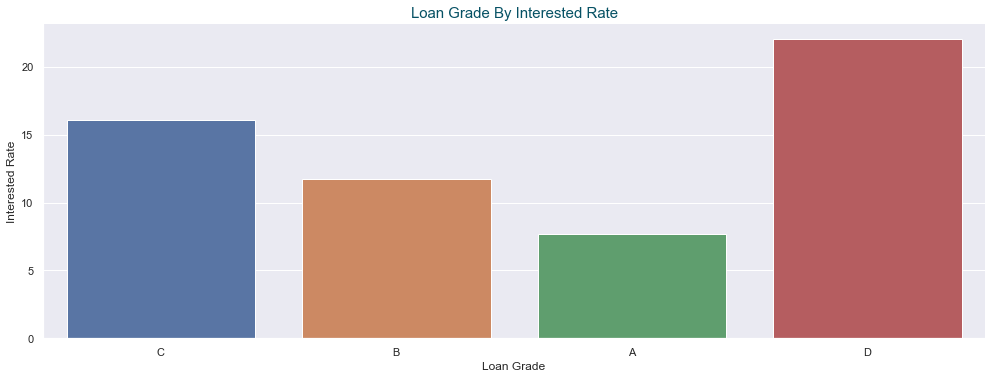

In [21]:
#interest rate by grade
#plt.figure(figsize=(15,5))
#f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
#fig = plt.figure(figsize = (10,6))
fig = plt.figure(figsize = (15,5))
sns.catplot(x='loan_grade',y='interested_rate',data=data ,kind='bar', order=data['loan_grade'].unique()
            , ci=None, height=5, aspect=11/4)
#plt.bar(data['loan_grade'].unique(), data['interested_rate'].value_counts(), color='#065164')
plt.title('Loan Grade By Interested Rate', fontsize='15', color='#065164')
plt.xlabel("Loan Grade")
plt.ylabel('Interested Rate')
#plt.xticks(rotation='45')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Loan Sub Grade By Interested Rate</center></h3>
<p></p>
<p></p>
<p></p>

<Figure size 1080x360 with 0 Axes>

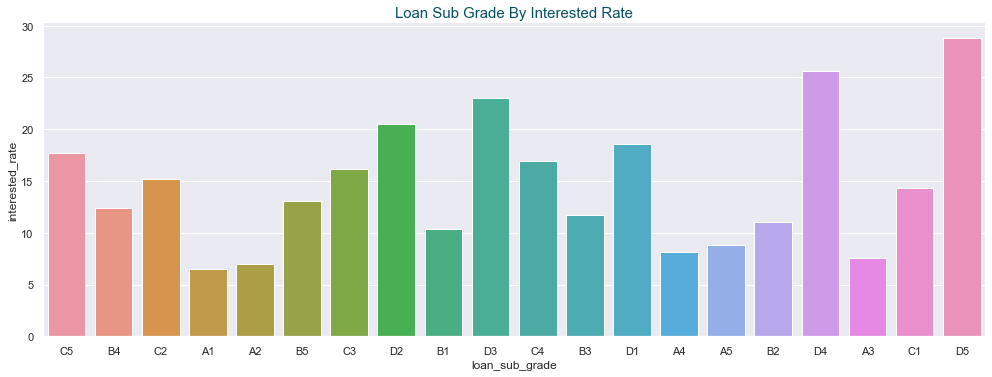

In [22]:
#plt.figure(figsize=(15,16))
#plt.figure(figsize=[25,7])
#sns.set(rc = {'figure.figsize':(25,8)})
fig = plt.figure(figsize = (15,5))

sns.catplot(x='loan_sub_grade',y='interested_rate',data=data,kind='bar', order=data['loan_sub_grade'].unique(), 
            ci=None, height=5, aspect=11/4)
plt.title('Loan Sub Grade By Interested Rate',fontsize='15', color='#065164')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Address State Where Loan Funded</center></h3>
<p></p>
<p></p>
<p></p>

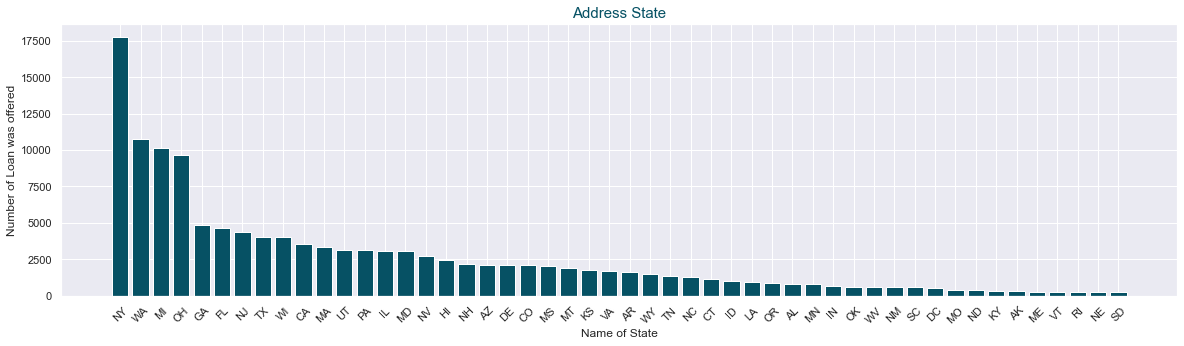

In [23]:
#address state was offered the loan
address_state = data['address_state'].value_counts()
plt.figure(figsize=(20,5))
plt.xticks(rotation='45')
plt.bar(data['address_state'].unique(), address_state,color='#065164')
plt.title('Address State', fontsize='15',color='#065164')
plt.xlabel('Name of State')
plt.ylabel('Number of Loan was offered')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Loan By Term</center></h3>
<p></p>
<p></p>
<p></p>

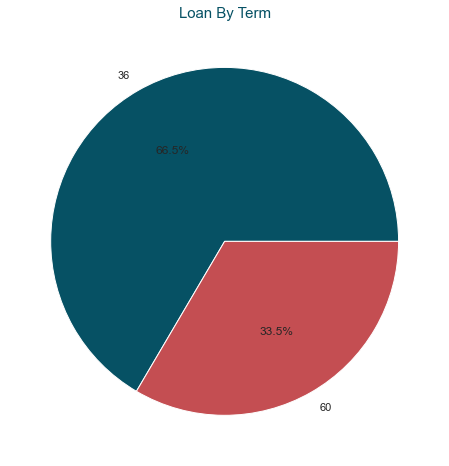

In [24]:
#number of loan group by term 36 and 60 months
loan_by_term = data['term'].value_counts()
label = data['term'].unique()
plt.figure(figsize=(15,8))
plt.pie(loan_by_term, labels=label,autopct='%1.1f%%', colors=['#065164', 'r'])
plt.title('Loan By Term', fontsize='15',color='#065164')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Loan By Term</center></h3>
<p></p>
<p></p>
<p></p>

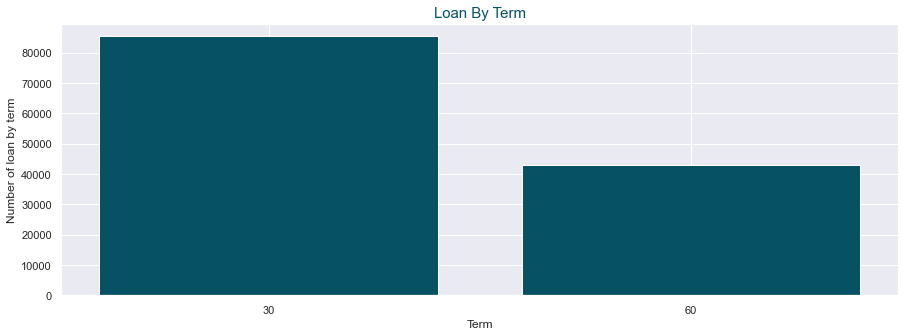

In [25]:
#bar plot, loan by term
plt.figure(figsize=(15,5))
plt.bar(['30','60'] ,loan_by_term,color='#065164')
plt.title('Loan By Term', fontsize='15', color='#065164')
plt.xlabel('Term')
plt.ylabel('Number of loan by term')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Loan By Initial List Status</center></h3>
<p></p>
<p></p>
<p></p>

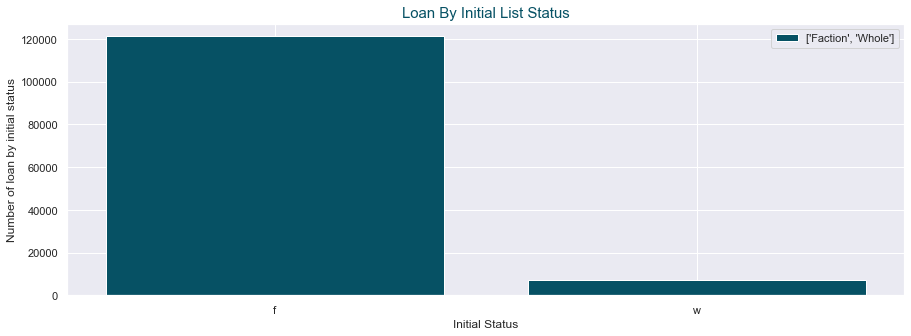

In [26]:
#loan by intitial status
# there are two value of initial status whole and Fraction
loan_by_initial = data['initial_list_status'].value_counts()
plt.figure(figsize=(15,5))
plt.bar(data['initial_list_status'].unique() ,loan_by_initial, color='#065164')
plt.title('Loan By Initial List Status', fontsize='15', color='#065164')
plt.xlabel('Initial Status')
plt.ylabel('Number of loan by initial status')
plt.legend([['Faction', 'Whole']])
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Loan Status</center></h3>
<p></p>
<p></p>
<p></p>

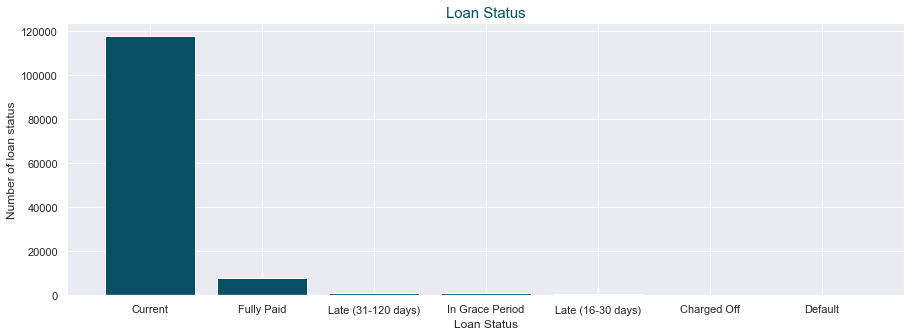

In [27]:
#loan status 
loan_status = data['loan_status'].value_counts()
type_loan_status = data['loan_status'].unique()
plt.figure(figsize=(15,5))
plt.bar(type_loan_status, loan_status ,color='#065164')
plt.title('Loan Status', fontsize='15', color='#065164')
plt.xlabel('Loan Status')
plt.ylabel('Number of loan status')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Good Loan VS Bad Loan</center></h3>
<p></p>
<p></p>
<p></p>

In [28]:
#Good loan: Current, Fully Paid
#Bad loan: Late(31-120Days)
#          In Grace Period Loan Status: Means that the loan was postponed for 2 weeks ... on the last date of payment
#          Late(16-30Days)
#          Charg off: Means late 90-180days and this loan is unlikely to be paid for the near future

#we need to see how many time each status happends?
data['loan_status'].value_counts()

Current               117482
Fully Paid              7836
Late (31-120 days)      1134
In Grace Period          857
Charged Off              705
Late (16-30 days)        228
Default                   16
Name: loan_status, dtype: int64

In [29]:
#define the good loan
good_loan = ["Current", "Fully Paid"]

In [30]:
#set a feature
data['loan_condition_type'] = np.nan

In [31]:
#create function to define loan type
def loan_condition_type(loan_status):
    if loan_status in good_loan:
        return "Good Loan"
    else:
        return "Bad Loan"

In [32]:
#apply loan_condition_type into loan_status
data['loan_condition_type'] = data['loan_status'].apply(loan_condition_type)

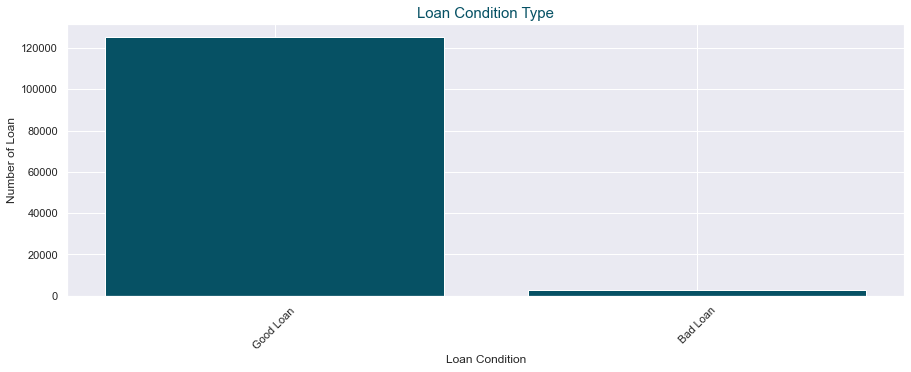

In [33]:
#loan condition type bar chart
plt.figure(figsize=(15,5))
plt.bar(data['loan_condition_type'].unique(), data['loan_condition_type'].value_counts(),color='#065164' )
plt.title('Loan Condition Type', fontsize='15', color='#065164')
plt.xlabel("Loan Condition")
plt.ylabel('Number of Loan')
plt.xticks(rotation='45')
plt.show()

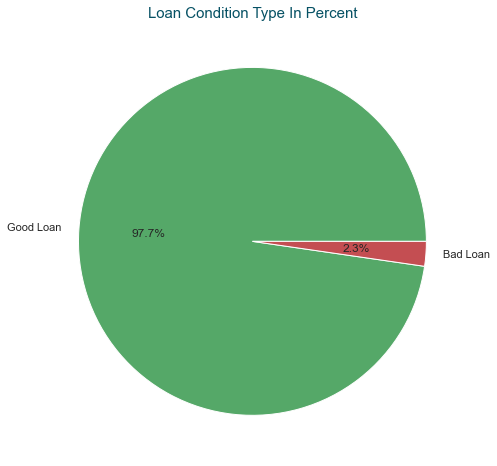

In [34]:
##loan condition type pie chart in percent
loan_condition_percent = data['loan_condition_type'].value_counts()
label = data['loan_condition_type'].unique()
plt.figure(figsize=(15,8))
plt.pie(loan_condition_percent, labels=label,autopct='%1.1f%%',  colors=['g','r'])
plt.title('Loan Condition Type In Percent', fontsize='15',color='#065164')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Loan Condition Types By Loan Grade</center></h3>
<p></p>
<p></p>
<p></p>

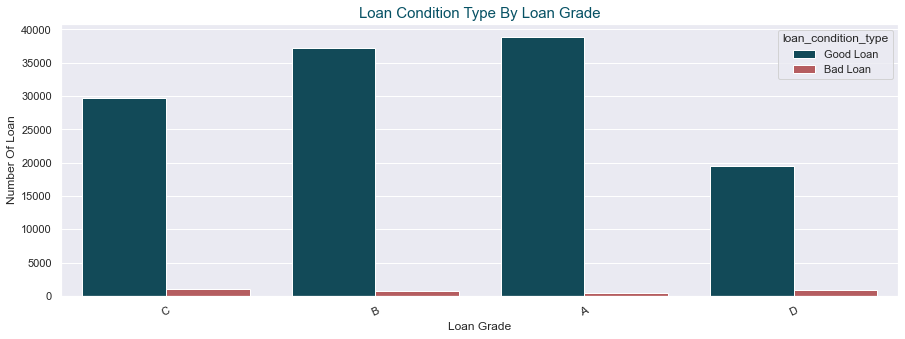

In [35]:
#loan purpose by term
fig = plt.figure(figsize = (15,5))
sns.countplot(x='loan_grade', hue='loan_condition_type', palette=['#065164','r'], data=data)
plt.title('Loan Condition Type By Loan Grade', fontsize='15', color='#065164')
plt.xlabel("Loan Grade")
plt.ylabel('Number Of Loan')
plt.xticks(rotation='25')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Loan Condition Types By Loan Sub Grade</center></h3>
<p></p>
<p></p>
<p></p>

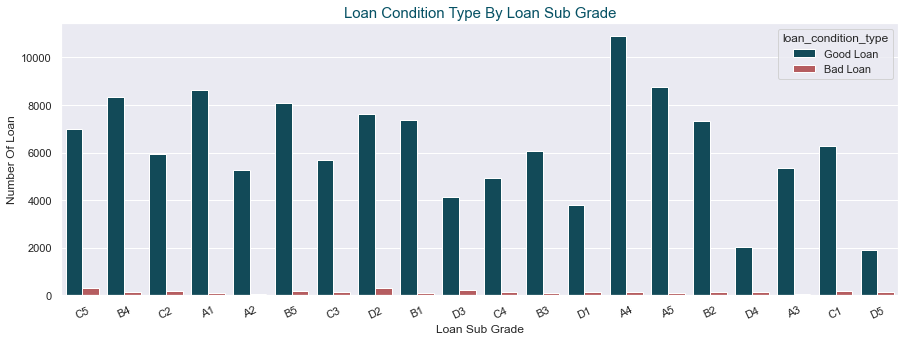

In [36]:
#loan purpose by term
fig = plt.figure(figsize = (15,5))
sns.countplot(x='loan_sub_grade', hue='loan_condition_type', palette=['#065164','r'], data=data)
plt.title('Loan Condition Type By Loan Sub Grade', fontsize='15', color='#065164')
plt.xlabel("Loan Sub Grade")
plt.ylabel('Number Of Loan')
plt.xticks(rotation='25')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Loan Condition Types By Term</center></h3>
<p></p>
<p></p>
<p></p>

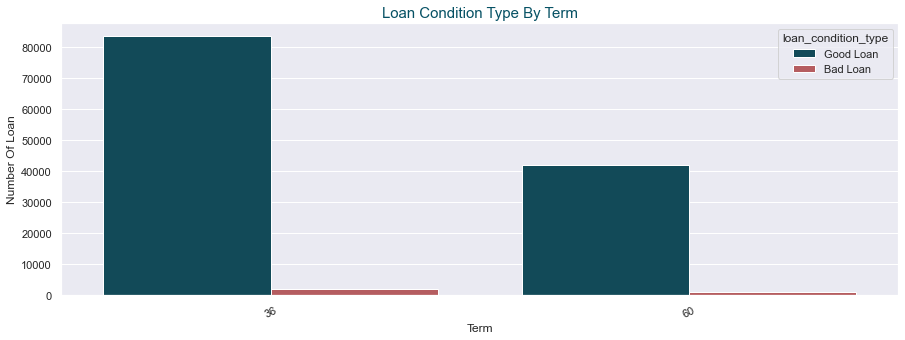

In [37]:
#loan condition types by term
fig = plt.figure(figsize = (15,5))
sns.countplot(x='term', hue='loan_condition_type', palette=['#065164','r'], data=data)
plt.title('Loan Condition Type By Term', fontsize='15', color='#065164')
plt.xlabel("Term")
plt.ylabel('Number Of Loan')
plt.xticks(rotation='25')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Loan By Borrower's Purpose</center></h3>
<p></p>
<p></p>
<p></p>

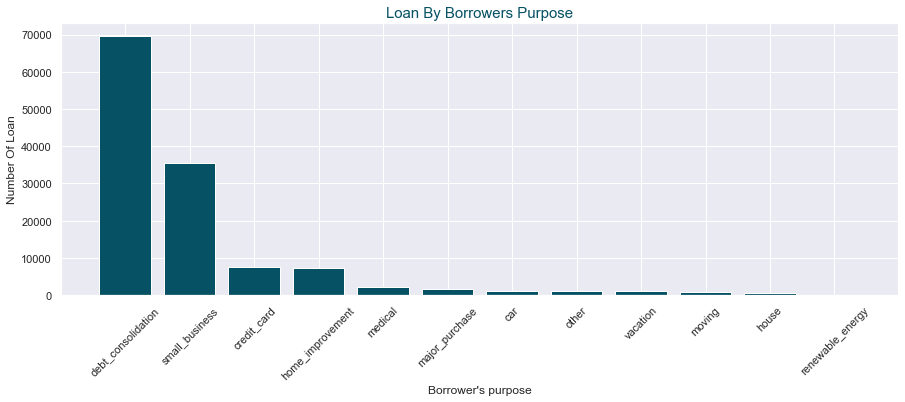

In [38]:
#loan by borrower's purpose
loan_by_purpose = data['borrower_purpose'].value_counts()
plt.figure(figsize=(15,5))
plt.bar(data['borrower_purpose'].unique(), loan_by_purpose,color='#065164' )
plt.title('Loan By Borrowers Purpose', fontsize='15', color='#065164')
plt.xlabel("Borrower's purpose")
plt.ylabel('Number Of Loan')
plt.xticks(rotation='45')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Loan Purpose By Term</center></h3>
<p></p>
<p></p>
<p></p>

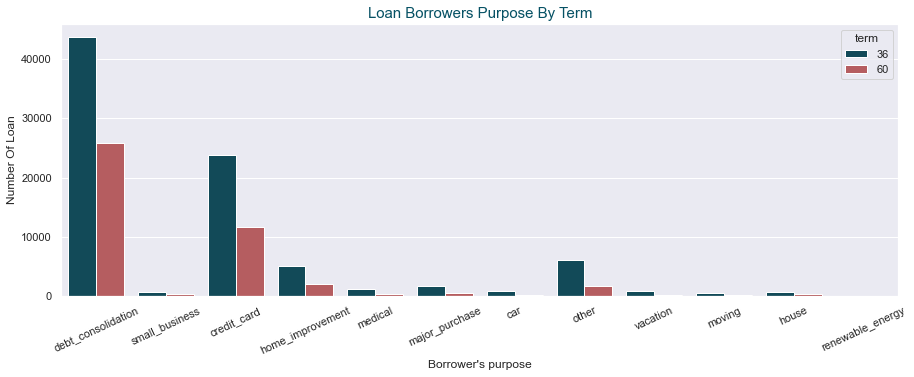

In [39]:
#loan purpose by term
fig = plt.figure(figsize = (15,5))
sns.countplot(x='borrower_purpose', hue='term', palette=['#065164','r'], data=data)
plt.title('Loan Borrowers Purpose By Term', fontsize='15', color='#065164')
plt.xlabel("Borrower's purpose")
plt.ylabel('Number Of Loan')
plt.xticks(rotation='25')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Loan Grade By Loan Amount</center></h3>
<p></p>
<p></p>
<p></p>

<Figure size 1080x360 with 0 Axes>

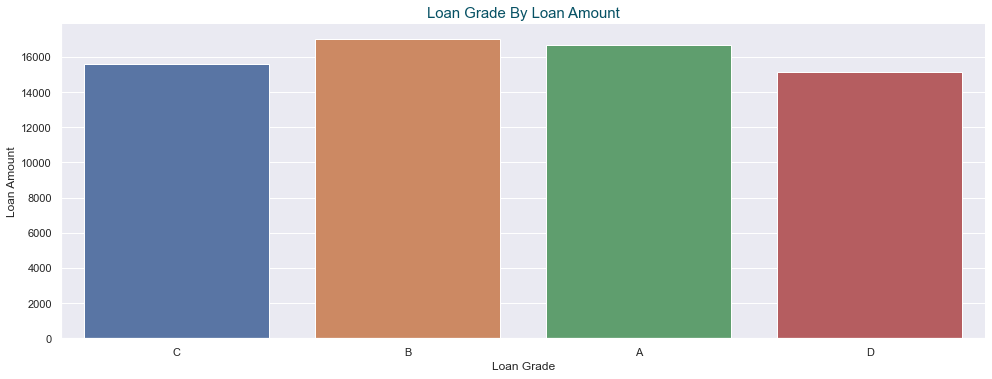

In [40]:
#loan grade by loan amount
fig = plt.figure(figsize = (15,5))
sns.catplot(x='loan_grade',y='loan_amount',data=data ,kind='bar', order=data['loan_grade'].unique()
            , ci=None, height=5, aspect=11/4)
#plt.bar(data['loan_grade'].unique(), data['interested_rate'].value_counts(), color='#065164')
plt.title('Loan Grade By Loan Amount', fontsize='15', color='#065164')
plt.xlabel("Loan Grade")
plt.ylabel('Loan Amount')
#plt.xticks(rotation='45')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Loan Sub Grade By Loan Amount</center></h3>
<p></p>
<p></p>
<p></p>

<Figure size 1080x360 with 0 Axes>

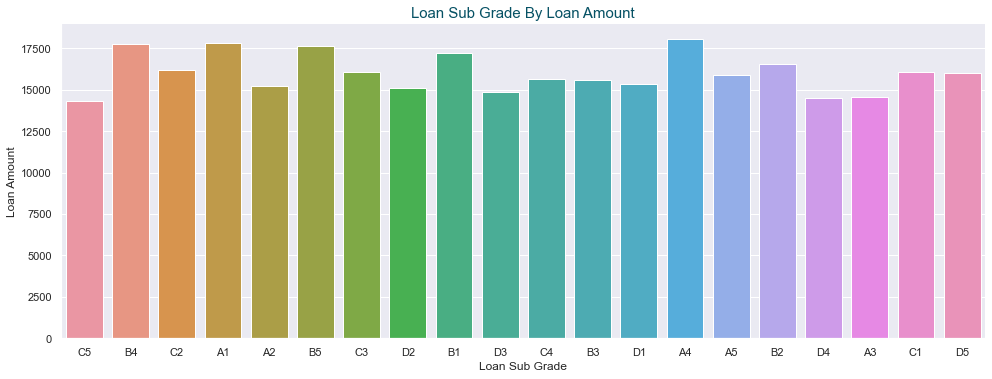

In [41]:
#loan sub grade by loan amount
fig = plt.figure(figsize = (15,5))
sns.catplot(x='loan_sub_grade',y='loan_amount',data=data ,kind='bar', order=data['loan_sub_grade'].unique()
            , ci=None, height=5, aspect=11/4)
#plt.bar(data['loan_grade'].unique(), data['interested_rate'].value_counts(), color='#065164')
plt.title('Loan Sub Grade By Loan Amount', fontsize='15', color='#065164')
plt.xlabel("Loan Sub Grade")
plt.ylabel('Loan Amount')
plt.xticks(rotation='0')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Loan Title</center></h3>
<p></p>
<p></p>
<p></p>

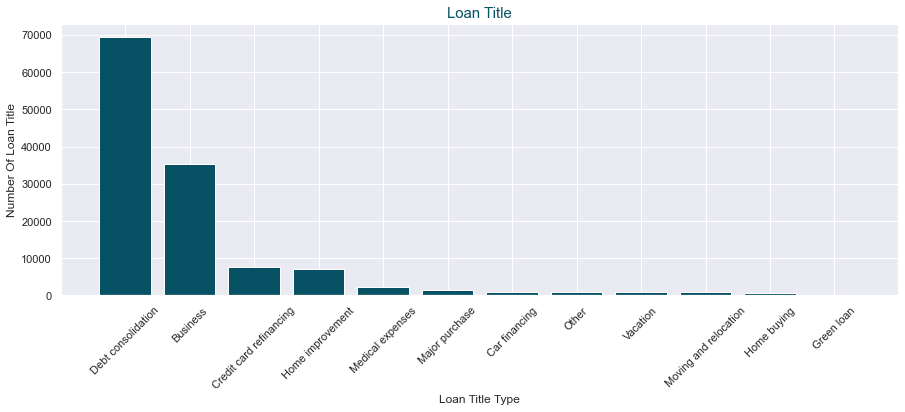

In [42]:
#loan title 
loan_title = data['loan_title'].value_counts()
plt.figure(figsize=(15,5))
plt.bar(data['loan_title'].unique(), loan_by_purpose,color='#065164' )
plt.title('Loan Title', fontsize='15', color='#065164')
plt.xlabel("Loan Title Type")
plt.ylabel('Number Of Loan Title')
plt.xticks(rotation='45')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Loan Verification Status</center></h3>
<p></p>
<p></p>
<p></p>

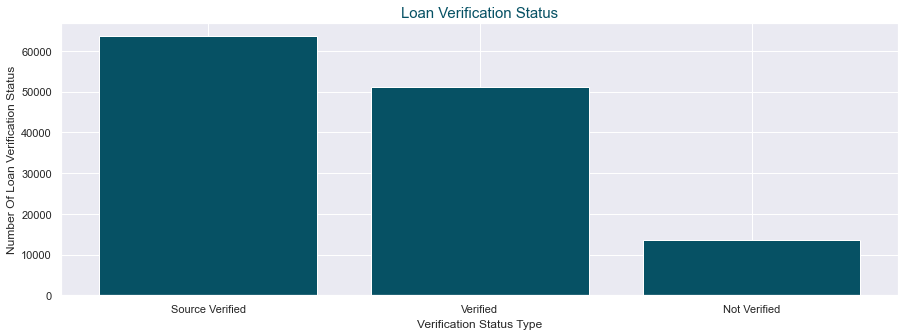

In [43]:
#loan verification status 
loan_verification_status = data['loan_verification_status'].value_counts()
plt.figure(figsize=(15,5))
plt.bar(data['loan_verification_status'].unique(), loan_verification_status,color='#065164' )
plt.title('Loan Verification Status', fontsize='15', color='#065164')
plt.xlabel("Verification Status Type")
plt.ylabel('Number Of Loan Verification Status')
#plt.xticks(rotation='45')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Number Inquiry Last 6 Months</center></h3>
<p></p>
<p></p>
<p></p>

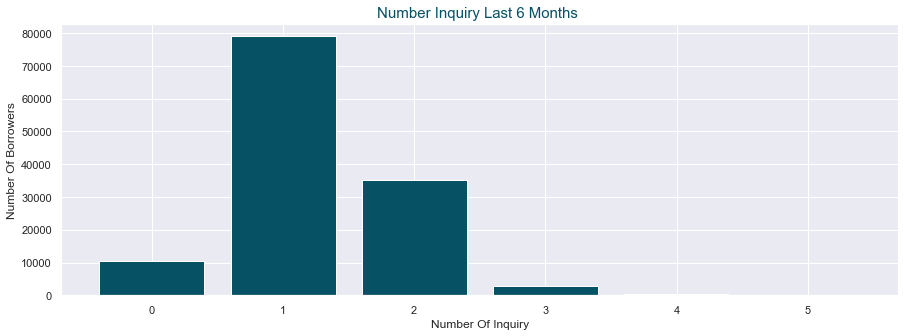

In [44]:
#number_inquiry_last_6mo
number_inquiry_last_6mo = data['number_inquiry_last_6mo'].value_counts()
plt.figure(figsize=(15,5))
plt.bar(data['number_inquiry_last_6mo'].unique(), number_inquiry_last_6mo ,color='#065164' )
plt.title('Number Inquiry Last 6 Months ', fontsize='15', color='#065164')
plt.xlabel("Number Of Inquiry")
plt.ylabel('Number Of Borrowers')
#plt.xticks(rotation='45')
plt.show()
#0    78972
#1    35182
#2    10559
#3     2820
#4      547
#5      178

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Date Of Loan Was Funded And Loan Amount</center></h3>
<p></p>
<p></p>
<p></p>

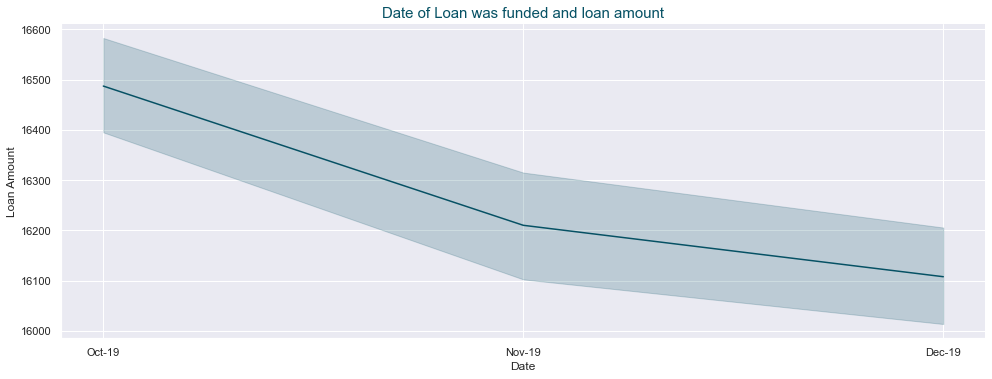

In [45]:
#date loan funded

sns.set_theme()
date_loan_funded = data.sort_values(by='date_loan_funded', ascending=False)
#plt.figure(figsize=(15,5))
#sns.set(axis_bgcolor='k')
sns.relplot(data=date_loan_funded, 
           x=date_loan_funded['date_loan_funded'],
           y=date_loan_funded['loan_amount'], kind='line',
           height=5, aspect=11/4, color='#065164')
plt.title('Date of Loan was funded and loan amount', fontsize='15', color='#065164')
plt.xlabel("Date")
plt.ylabel('Loan Amount')
plt.show()

In [46]:
type(date_loan_funded)

pandas.core.frame.DataFrame

In [47]:
#let's consider about good and bad loan
#according to investopedia.com:
# Good loan: education, business, estate, borrow to invest: it takes money to make money
#Bad loan: cars, cloths: it takes money not make money

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Date Loan Funded By Debt To Income</center></h3>
<p></p>
<p></p>
<p></p>

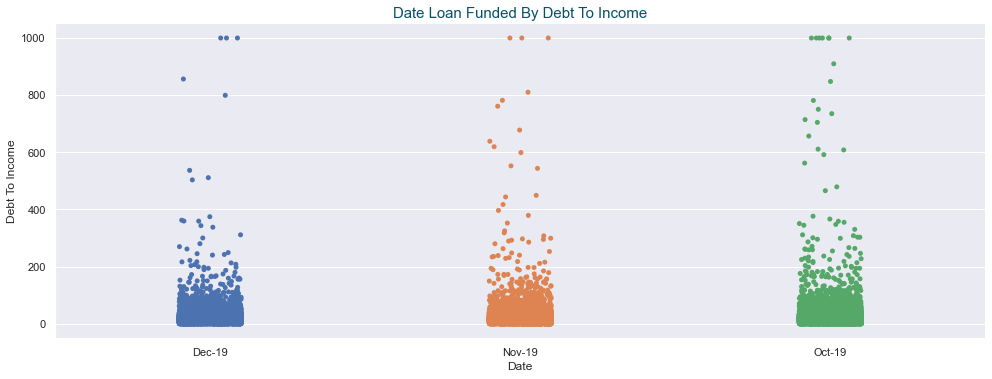

In [48]:
sns.catplot(x="date_loan_funded", y="debt_to_income", 
            data=data,height=5, 
            aspect=11/4)
plt.title('Date Loan Funded By Debt To Income', fontsize='15', color='#065164')
plt.xlabel("Date")
plt.ylabel('Debt To Income')
plt.show()
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Borrower Job Title</center></h3>
<p></p>
<p></p>
<p></p>

In [49]:
borrower_job_title = data.sort_values(by='loan_amount', ascending=False).head(10)
borrower_job_title = borrower_job_title[['borrower_job_title', 'loan_amount']]
borrower_job_title

,borrower_job_title,loan_amount
113326,Managing Director,40000
39809,0,40000
124359,Vice President Technology,40000
106116,Manager of Systems and Analytics,40000
77973,VIce President,40000
106114,REGISTERED NURSE,40000
106107,Rural Carrier,40000
55444,Founder & CEO,40000
76028,CPA,40000
124371,RN,40000


<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Borrower Length Experience</center></h3>
<p></p>
<p></p>
<p></p>

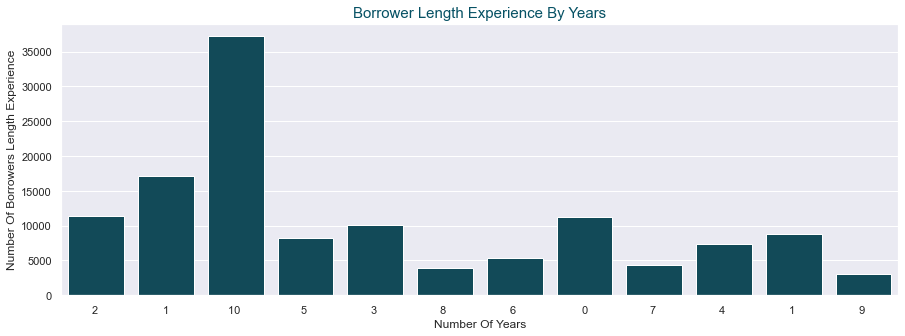

10     37171
 1     17136
2      11398
0      11231
3      10088
1       8811
5       8254
4       7438
6       5380
7       4365
8       3898
9       3088
Name: borrower_length_expereince, dtype: int64


In [50]:
plt.figure(figsize=(15,5))
sns.countplot(x='borrower_length_expereince',data=data,palette=['#065164'])

plt.title('Borrower Length Experience By Years', fontsize='15', color='#065164')
plt.xlabel("Number Of Years")
plt.ylabel('Number Of Borrowers Length Experience')
plt.xticks(rotation='0')
plt.show()

length_experience = data['borrower_length_expereince'].value_counts()
print(length_experience)

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Borrower Length Experience</center></h3>
<p></p>
<p></p>
<p></p>

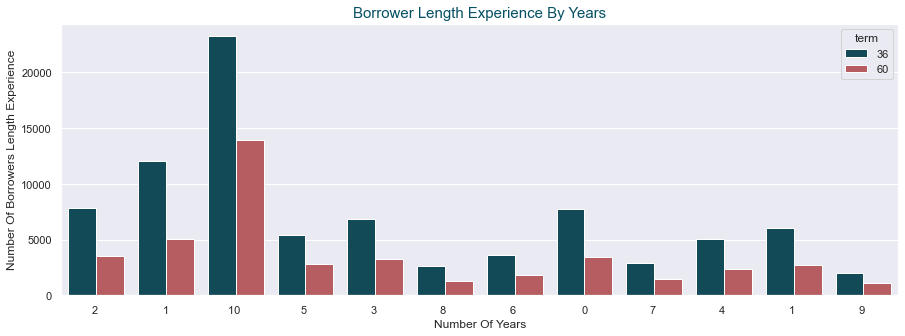

In [51]:
plt.figure(figsize=(15,5))
sns.countplot(x='borrower_length_expereince',hue='term',data=data,palette=['#065164','r'])

plt.title('Borrower Length Experience By Years', fontsize='15', color='#065164')
plt.xlabel("Number Of Years")
plt.ylabel('Number Of Borrowers Length Experience')
plt.xticks(rotation='0')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Borrower's Home Ownership</center></h3>
<p></p>
<p></p>
<p></p>

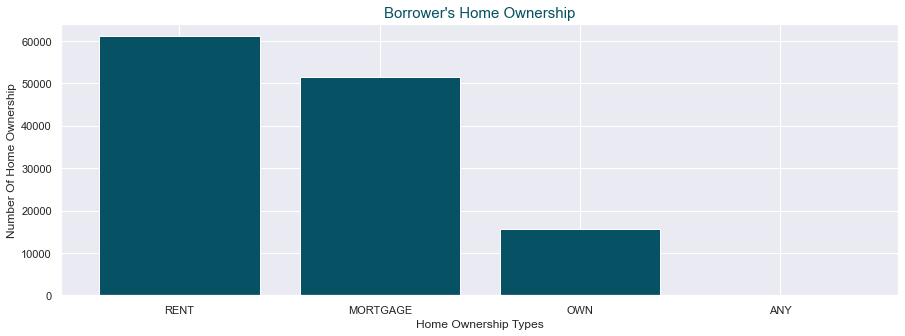

In [52]:
plt.figure(figsize=(15,5))
plt.bar(data['home_ownership'].unique(), 
        data['home_ownership'].value_counts() ,
        color='#065164' )
plt.title("Borrower's Home Ownership", fontsize='15', color='#065164')
plt.xlabel("Home Ownership Types")
plt.ylabel('Number Of Home Ownership')
plt.xticks(rotation='0')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Borrower's Home Ownership By Term</center></h3>
<p></p>
<p></p>
<p></p>

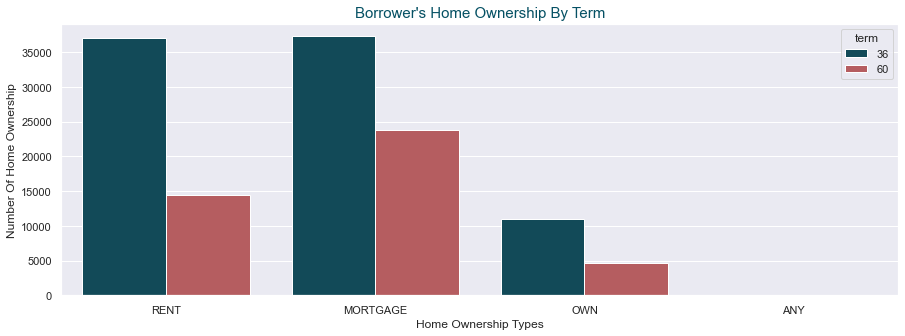

In [53]:
fig = plt.figure(figsize = (15,5))
sns.countplot(x='home_ownership', hue='term', palette=['#065164','r'], data=data)
plt.title("Borrower's Home Ownership By Term", fontsize='15', color='#065164')
plt.xlabel("Home Ownership Types")
plt.ylabel('Number Of Home Ownership')
plt.xticks(rotation='0')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Borrower Annual Income</center></h3>
<p></p>
<p></p>
<p></p>

In [54]:
data['borrower_annual_income'].describe()

count    1.282580e+05
mean     8.579460e+04
std      1.031360e+05
min      0.000000e+00
25%      5.000000e+04
50%      7.000000e+04
75%      1.000000e+05
max      9.682505e+06
Name: borrower_annual_income, dtype: float64

In [55]:
print("Maximum Annual Income:", data['borrower_annual_income'].max())
print("Average Annual Income:", data['borrower_annual_income'].mean())
print("Minimum Annual Income:", data['borrower_annual_income'].min())

Maximum Annual Income: 9682505.0
Average Annual Income: 85794.60095916032
Minimum Annual Income: 0.0


<p style='color:red'>According to investpedia.com, in US annual income(Low, Medium, High)</p>

<img src="annual_income_range.png" alt="Girl in a jacket" width="1000" height="100">

<a href="https://www.investopedia.com/financial-edge/0912/which-income-class-are-you.aspx" style='color:red;font-size:18px'><center>Check here to see more details</center></a>

In [56]:
#let's define income condition
low_income = data['borrower_annual_income'] < 25000
medium_income = (data['borrower_annual_income'] >= 25000) & (data['borrower_annual_income'] < 180000)
high_income = data['borrower_annual_income'] >= 180000

#set annual income condition
annual_income_condition = [low_income, medium_income, high_income]
annual_income_range = ['low', 'medium','high']
#add 1 dimensiont to data
data['annual_income_range'] = np.select(annual_income_condition, annual_income_range)

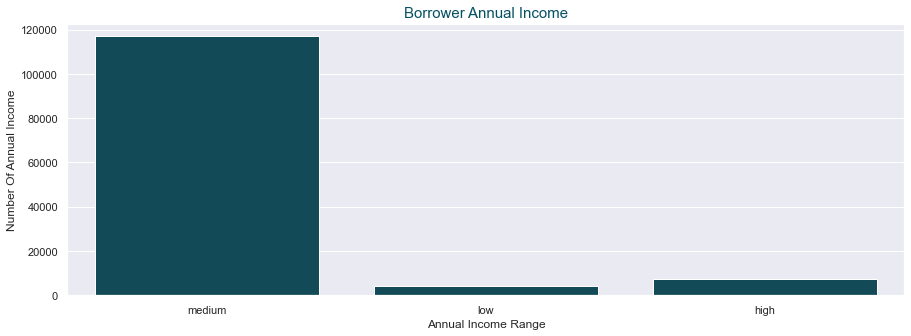

In [57]:
#borrower annual income bar
fig = plt.figure(figsize=(15,5))
sns.countplot(x='annual_income_range', data=data, color='#065164')
plt.title("Borrower Annual Income", fontsize='15', color='#065164')
plt.xlabel("Annual Income Range")
plt.ylabel('Number Of Annual Income')
plt.xticks(rotation='0')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Loan Condition Types By Annual Income Range</center></h3>
<p></p>
<p></p>
<p></p>

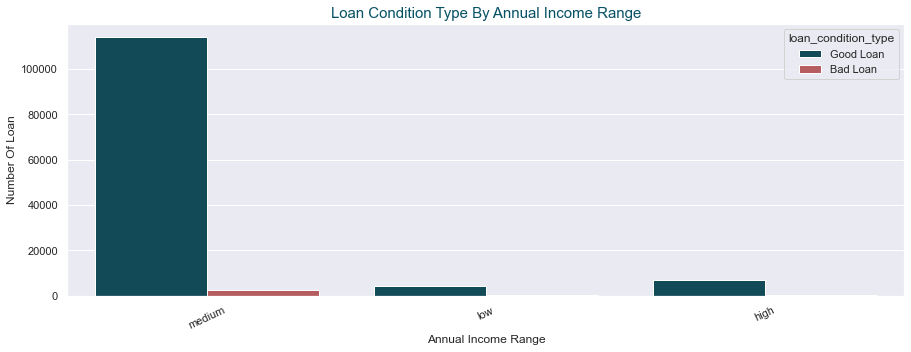

In [58]:
#loan condition types by annual income range
fig = plt.figure(figsize = (15,5))
sns.countplot(x='annual_income_range', hue='loan_condition_type', palette=['#065164','r'], data=data)
plt.title('Loan Condition Type By Annual Income Range', fontsize='15', color='#065164')
plt.xlabel("Annual Income Range")
plt.ylabel('Number Of Loan')
plt.xticks(rotation='25')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>High VS Low Interest Rate</center></h3>
<p></p>
<p></p>
<p></p>

In [59]:
#calculate interest rate in average
interest_rate_avg = data['interested_rate'].mean()
print("Average value of interest rate: ", interest_rate_avg, "%")

Average value of interest rate:  13.195972492948963 %


In [60]:
#def interest_rate_level
def interest_rate_level(interest_rate):
    if(interest_rate > interest_rate_avg):
        return "High"
    else:
        return "Low"

In [61]:
#add a column
data['interest_rate_condition'] = data['interested_rate'].apply(lambda x:interest_rate_level(x))

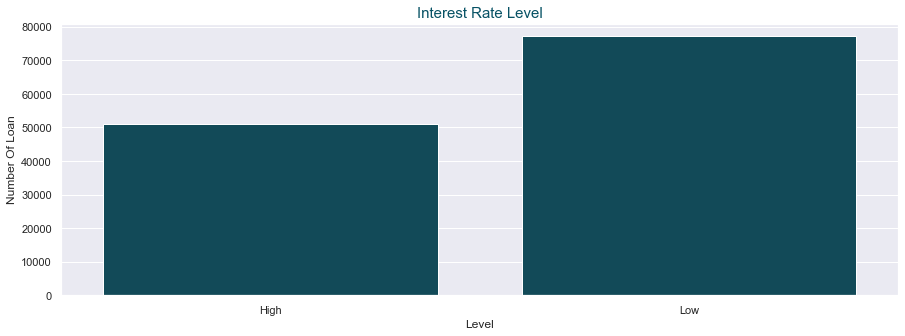

In [62]:
#interest rate condition
fig = plt.figure(figsize = (15,5))
sns.countplot(x='interest_rate_condition', data=data, color='#065164')
plt.title("Interest Rate Level", fontsize='15', color='#065164')
plt.xlabel("Level")
plt.ylabel('Number Of Loan')
plt.xticks(rotation='0')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Interest Rate Level By Loan Grade</center></h3>
<p></p>
<p></p>
<p></p>

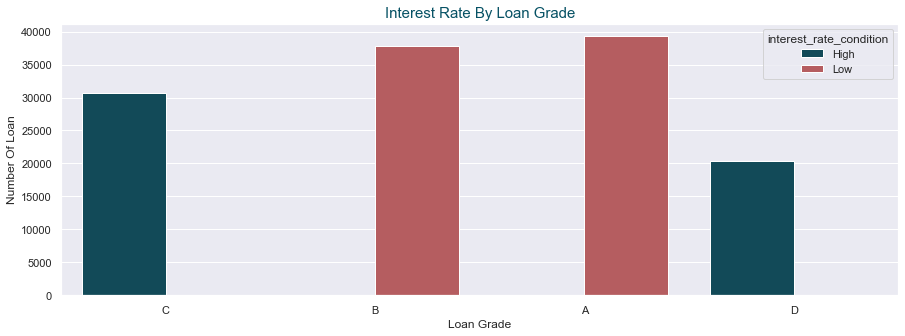

In [63]:
#interest rate by loan grade
fig = plt.figure(figsize = (15,5))
sns.countplot(x='loan_grade', hue='interest_rate_condition', palette=['#065164','r'], data=data)
plt.title('Interest Rate By Loan Grade', fontsize='15', color='#065164')
plt.xlabel("Loan Grade")
plt.ylabel('Number Of Loan')
plt.xticks(rotation='0')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Interest Rate Level By Loan Sub Grade</center></h3>
<p></p>
<p></p>
<p></p>

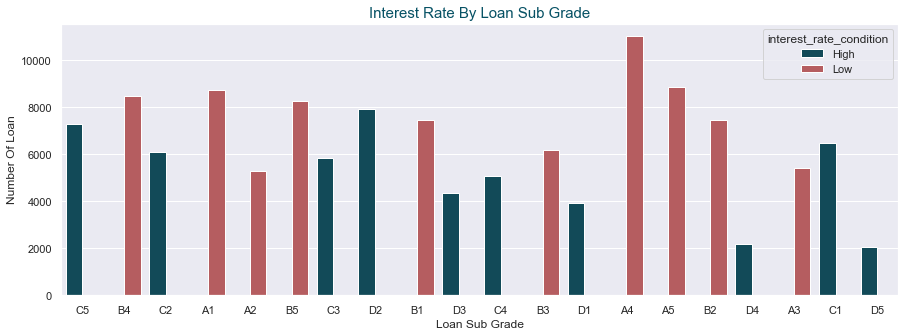

In [64]:
#interest rate by loan sub grade
fig = plt.figure(figsize = (15,5))
sns.countplot(x='loan_sub_grade', hue='interest_rate_condition', palette=['#065164','r'], data=data)
plt.title('Interest Rate By Loan Sub Grade', fontsize='15', color='#065164')
plt.xlabel("Loan Sub Grade")
plt.ylabel('Number Of Loan')
plt.xticks(rotation='0')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Interest Rate Level By Term</center></h3>
<p></p>
<p></p>
<p></p>

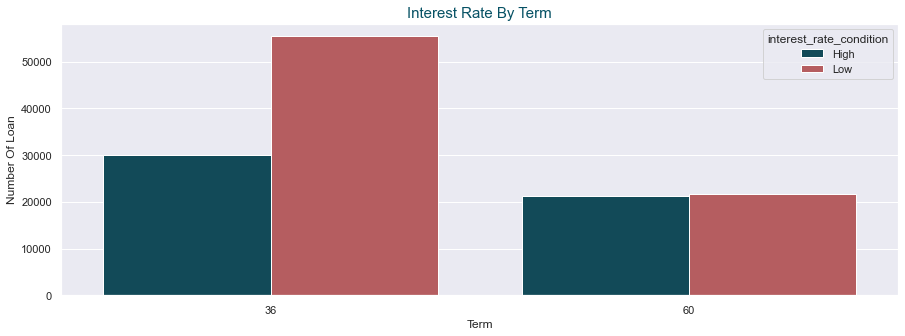

In [65]:
#interest rate by term
fig = plt.figure(figsize = (15,5))
sns.countplot(x='term', hue='interest_rate_condition', palette=['#065164','r'], data=data)
plt.title('Interest Rate By Term', fontsize='15', color='#065164')
plt.xlabel("Term")
plt.ylabel('Number Of Loan')
plt.xticks(rotation='0')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Interest Rate Level By Loan Condition Type</center></h3>
<p></p>
<p></p>
<p></p>

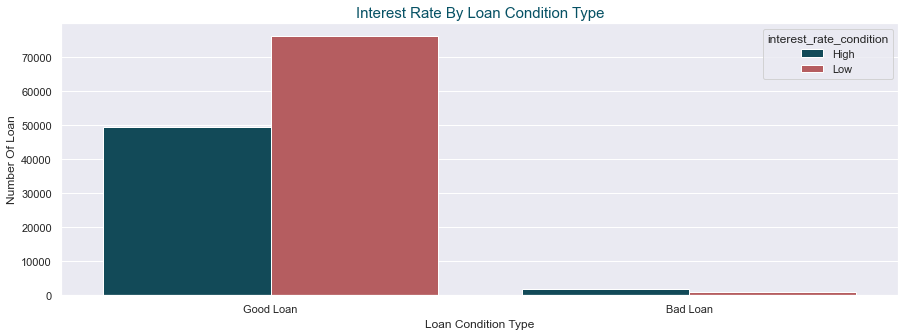

In [66]:
#interest rate by loan condition type
fig = plt.figure(figsize = (15,5))
sns.countplot(x='loan_condition_type', hue='interest_rate_condition', palette=['#065164','r'], data=data)
plt.title('Interest Rate By Loan Condition Type', fontsize='15', color='#065164')
plt.xlabel("Loan Condition Type")
plt.ylabel('Number Of Loan')
plt.xticks(rotation='0')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Interest Rate Level By Annual Income Range</center></h3>
<p></p>
<p></p>
<p></p>

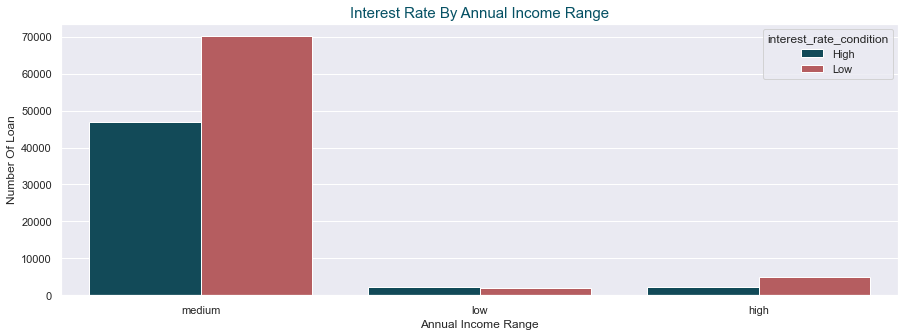

In [67]:
fig = plt.figure(figsize = (15,5))
sns.countplot(x='annual_income_range', hue='interest_rate_condition', palette=['#065164','r'], data=data)
plt.title('Interest Rate By Annual Income Range', fontsize='15', color='#065164')
plt.xlabel("Annual Income Range")
plt.ylabel('Number Of Loan')
plt.xticks(rotation='0')
plt.show()

<p></p>
<p></p>
<p></p>
<h3 style='color:#065164'><center>Study Correlation Between Loan Amount With Some Features</center></h3>
<p></p>
<p></p>
<p></p>

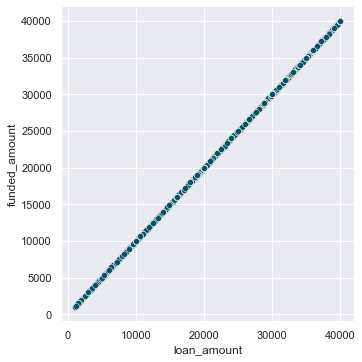

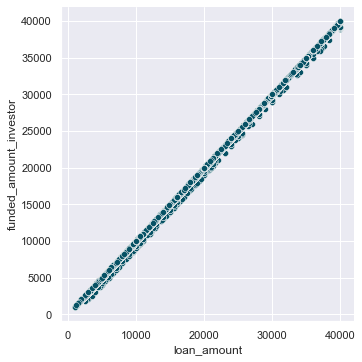

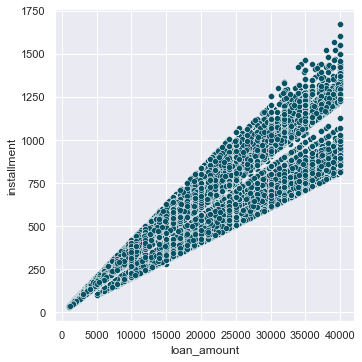

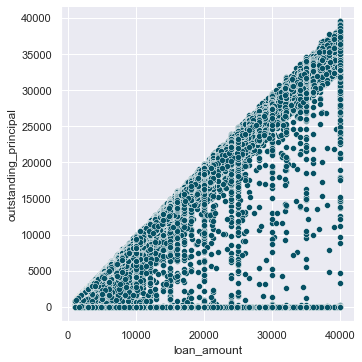

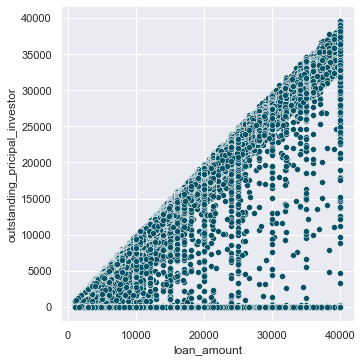

In [68]:
#We will study about correlation between features to loan status

# Set up the matplotlib figure
#fig, ax = plt.subplots()
#f, axes = plt.subplots(ncols=5, figsize=(15, 5))
sns.relplot(x='loan_amount', y='funded_amount', data=data, kind='scatter', color='#065164')
sns.relplot(x='loan_amount', y='funded_amount_investor', data=data, kind='scatter', color='#065164')
sns.relplot(x='loan_amount', y='installment', data=data, kind='scatter', color='#065164')
sns.relplot(x='loan_amount', y='outstanding_principal', data=data, kind='scatter', color='#065164')
sns.relplot(x='loan_amount', y='outstanding_pricipal_investor', data=data, kind='scatter', color='#065164')
plt.show()
